# Life Expectancy Model (Machine Learning Assignment) By Sahar Ejaz

## Load the dataset

### Subtask:
Load the "Life Expectancy Data.csv" file into a pandas DataFrame.


In [ ]:

import pandas as pd

df = pd.read_csv('/content/Life Expectancy Data.csv')

In [ ]:
df.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


## Explore the data

### Subtask:
Display the first few rows, check the data types, and look for missing values.


**Reasoning**:
Display the first few rows, check the data types, and look for missing values as requested by the instructions.



In [ ]:
display(df.head())
df.info()
display(df.isnull().sum())

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0


## Handle missing values

### Subtask:
Decide on a strategy for dealing with missing values (e.g., imputation, removal) and implement it.

Reasoning: Analyze the distribution of missing values and decide on an imputation strategy for numerical columns with significant missing values based on their distribution. Then, impute missing values for these columns using the chosen method.

In [ ]:
print("Missing values before imputation:")
display(df.isnull().sum())

# Analyze distribution of numerical columns with significant missing values
numerical_cols_with_missing = ['Population', 'Hepatitis B', 'GDP', 'Total expenditure', 'Alcohol']
print("\nDistribution of numerical columns with missing values:")
display(df[numerical_cols_with_missing].describe())

# Impute missing values for numerical columns.
# For 'Population', 'GDP', 'Total expenditure', and 'Alcohol', the median might be a robust choice due to potential outliers.
# For 'Hepatitis B', the mean might be suitable if the distribution is not heavily skewed.
# Based on the describe output, median seems appropriate for all.
for col in numerical_cols_with_missing:
    df[col].fillna(df[col].median(), inplace=True)

print("\nMissing values after imputation:")
display(df.isnull().sum())

Missing values before imputation:


,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,194
percentage expenditure,0
Hepatitis B,553
Measles,0



Distribution of numerical columns with missing values:


,Population,Hepatitis B,GDP,Total expenditure,Alcohol
count,2.286000e+03,2385.000000,2490.000000,2712.00000,2744.000000
mean,1.275338e+07,80.940461,7483.158469,5.93819,4.602861
std,6.101210e+07,25.070016,14270.169342,2.49832,4.052413
min,3.400000e+01,1.000000,1.681350,0.37000,0.010000
25%,1.957932e+05,77.000000,463.935626,4.26000,0.877500
50%,1.386542e+06,92.000000,1766.947595,5.75500,3.755000
75%,7.420359e+06,97.000000,5910.806335,7.49250,7.702500
max,1.293859e+09,99.000000,119172.741800,17.60000,17.870000



Missing values after imputation:


/tmp/ipython-input-4095103147.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


,0
Country,0
Year,0
Status,0
Life expectancy,10
Adult Mortality,10
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0


In [ ]:
# Identify columns with remaining missing values
cols_with_remaining_missing = df.columns[df.isnull().any()].tolist()
print("Columns with remaining missing values:", cols_with_remaining_missing)

# Analyze distribution of remaining numerical columns with missing values
numerical_cols_remaining = ['Life expectancy ', 'Adult Mortality', ' BMI ', 'Polio', 'Diphtheria ', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']
print("\nDistribution of remaining numerical columns with missing values:")
display(df[numerical_cols_remaining].describe())

# Impute missing values for the remaining numerical columns using the median.
for col in numerical_cols_remaining:
    df[col].fillna(df[col].median(), inplace=True)

# Check missing values after handling remaining columns
print("\nMissing values after handling remaining numerical columns:")
display(df.isnull().sum())

Columns with remaining missing values: ['Life expectancy ', 'Adult Mortality', ' BMI ', 'Polio', 'Diphtheria ', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']

Distribution of remaining numerical columns with missing values:


,Life expectancy,Adult Mortality,BMI,Polio,Diphtheria,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2928.000000,2928.000000,2904.000000,2919.000000,2919.000000,2904.000000,2904.000000,2771.000000,2775.000000
mean,69.224932,164.796448,38.321247,82.550188,82.324084,4.839704,4.870317,0.627551,11.992793
std,9.523867,124.292079,20.044034,23.428046,23.716912,4.420195,4.508882,0.210904,3.358920
min,36.300000,1.000000,1.000000,3.000000,2.000000,0.100000,0.100000,0.000000,0.000000
25%,63.100000,74.000000,19.300000,78.000000,78.000000,1.600000,1.500000,0.493000,10.100000
50%,72.100000,144.000000,43.500000,93.000000,93.000000,3.300000,3.300000,0.677000,12.300000
75%,75.700000,228.000000,56.200000,97.000000,97.000000,7.200000,7.200000,0.779000,14.300000
max,89.000000,723.000000,87.300000,99.000000,99.000000,27.700000,28.600000,0.948000,20.700000



Missing values after handling remaining numerical columns:


/tmp/ipython-input-461316192.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


,0
Country,0
Year,0
Status,0
Life expectancy,0
Adult Mortality,0
infant deaths,0
Alcohol,0
percentage expenditure,0
Hepatitis B,0
Measles,0


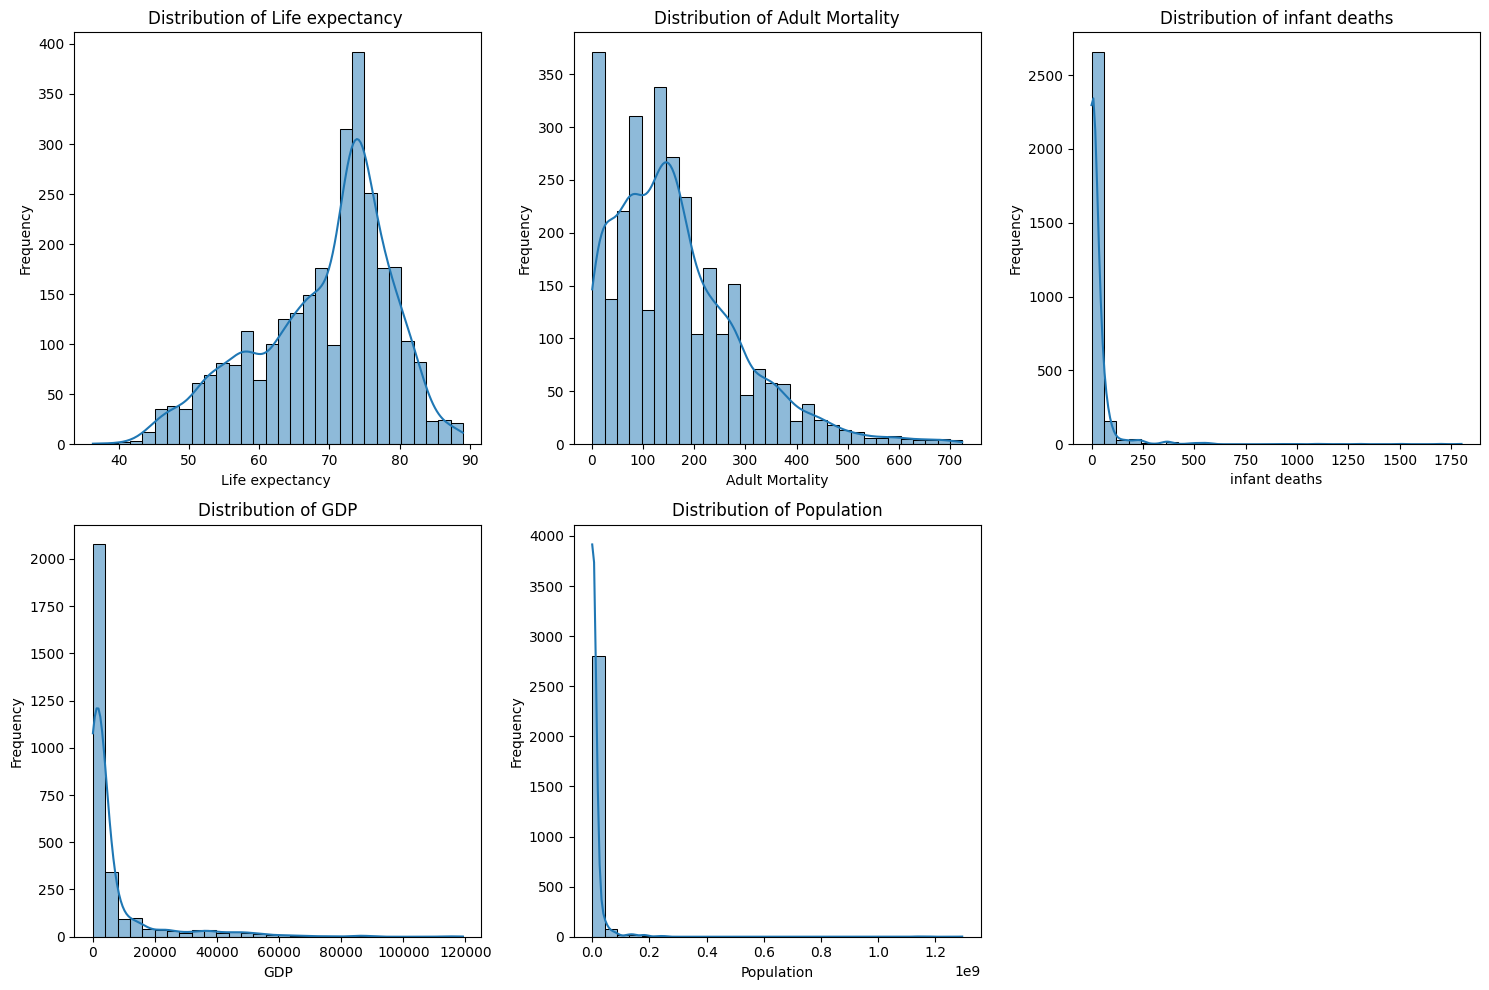

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

selected_vars = ['Life expectancy ', 'Adult Mortality', 'infant deaths', 'GDP', 'Population']

plt.figure(figsize=(15, 10))
for i, var in enumerate(selected_vars):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df[var], kde=True, bins=30)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# Explore relationships
Subtask:
Investigate the relationships between different variables using visualizations (e.g., scatter plots, correlation matrix).

**Reasoning**:
Calculate the correlation matrix for the numerical columns and create a heatmap to visualize the relationships between variables.



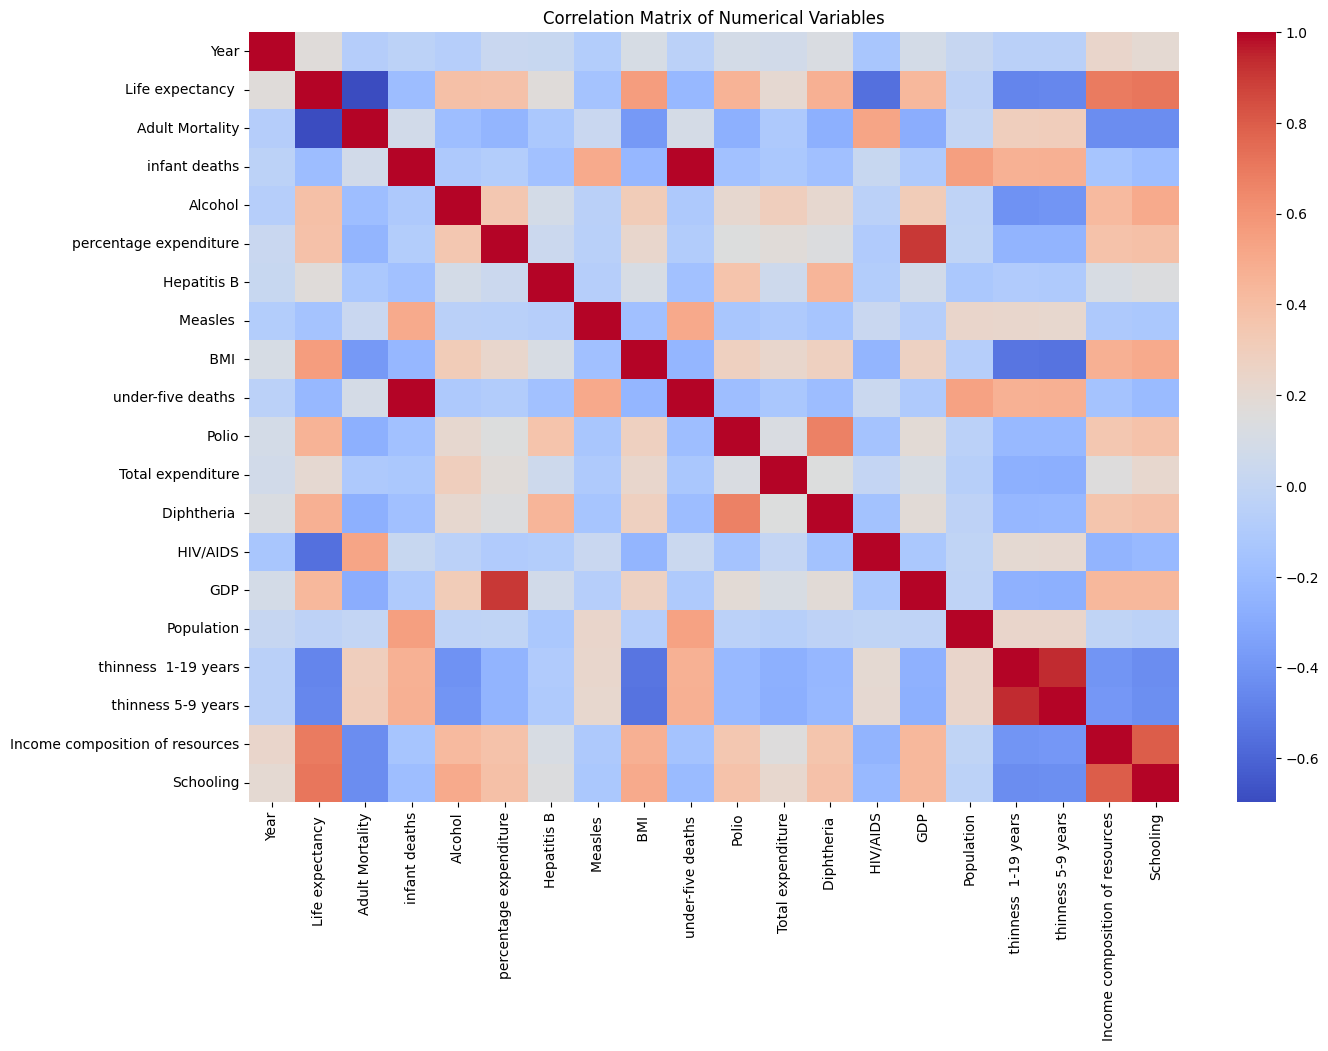

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

Reasoning: Create scatter plots for a few pairs of variables with interesting relationships based on the correlation matrix.



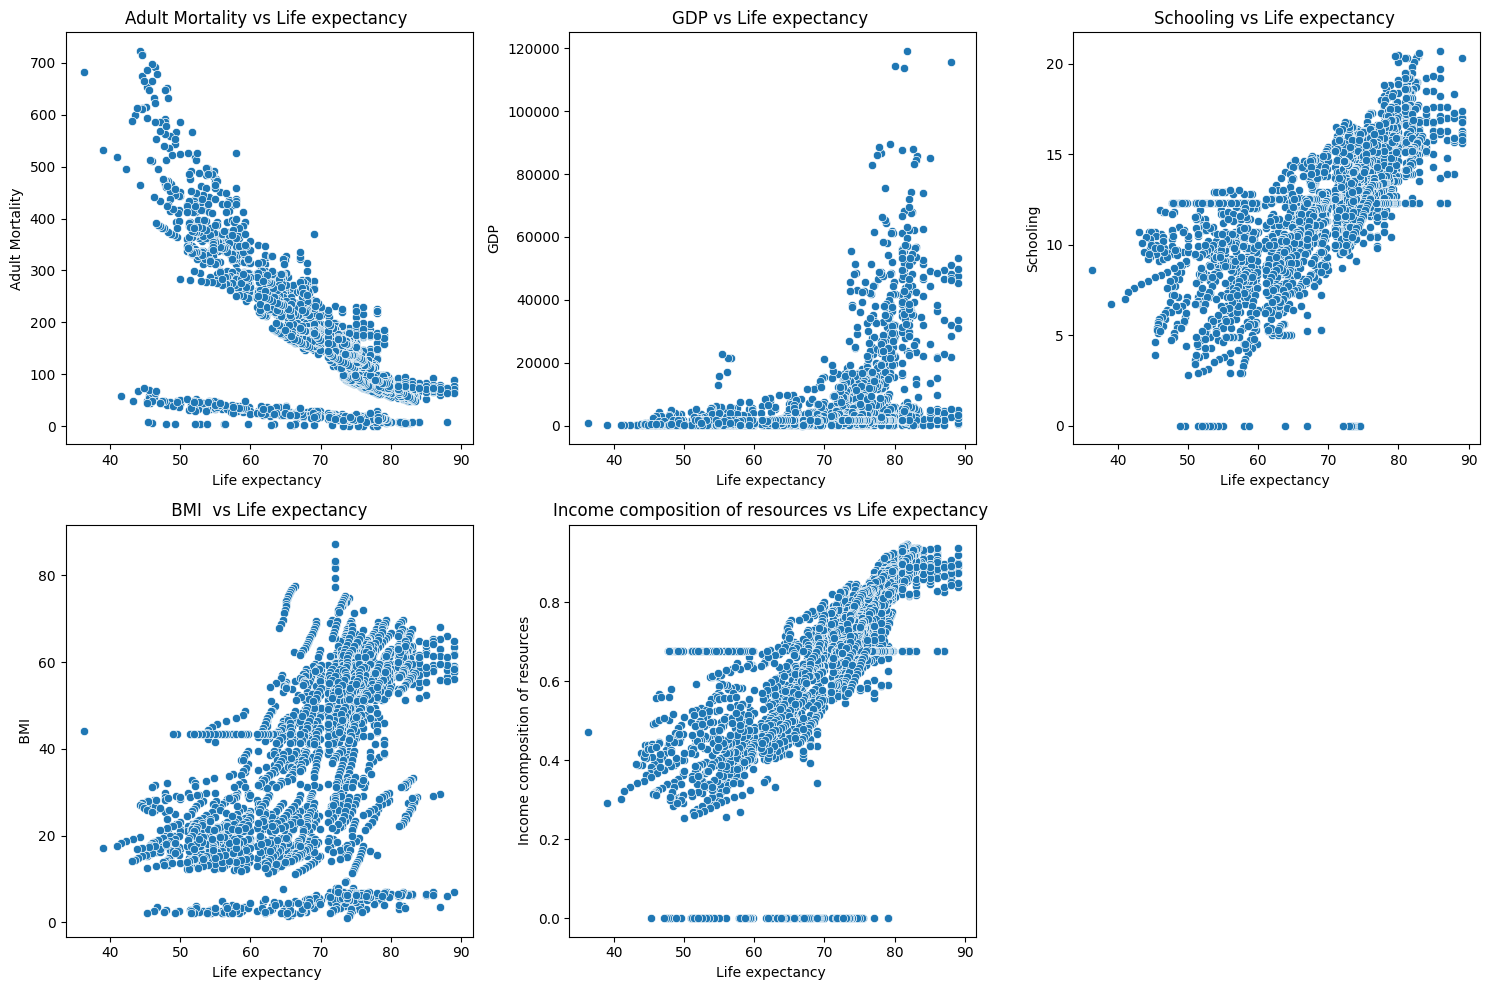

In [ ]:
# Select pairs of variables with potentially interesting relationships
selected_pairs = [
    ('Life expectancy ', 'Adult Mortality'),
    ('Life expectancy ', 'GDP'),
    ('Life expectancy ', 'Schooling'),
    ('Life expectancy ', ' BMI '),
    ('Life expectancy ', 'Income composition of resources')
]

plt.figure(figsize=(15, 10))
for i, (x_var, y_var) in enumerate(selected_pairs):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(data=df, x=x_var, y=y_var)
    plt.title(f'{y_var} vs {x_var}')
    plt.xlabel(x_var)
    plt.ylabel(y_var)

plt.tight_layout()
plt.show()

# Perform feature engineering (if needed)
Subtask:
Create new features or transform existing ones to improve the analysis.

**Reasoning**:
Create the 'GDP per Capita' feature by dividing 'GDP' by 'Population' and explore other potential feature transformations.


In [ ]:
# Create 'GDP per Capita' feature, handling potential division by zero
df['GDP per Capita'] = df['GDP'] / df['Population']

# Fill infinite values resulting from division by zero or missing values after division
df['GDP per Capita'].replace([float('inf'), float('-inf')], pd.NA, inplace=True)
df['GDP per Capita'].fillna(df['GDP per Capita'].median(), inplace=True)

# Consider creating an interaction term between Schooling and Income composition of resources
df['Schooling * Income'] = df['Schooling'] * df['Income composition of resources']

# Consider log transforming skewed variables like GDP and Population if needed for modeling later
# For now, we will just create the GDP per Capita feature and an interaction term.

# Display the new columns and some related columns to verify
display(df[['GDP', 'Population', 'GDP per Capita', 'Schooling', 'Income composition of resources', 'Schooling * Income']].head())
display(df[['GDP', 'Population', 'GDP per Capita', 'Schooling', 'Income composition of resources', 'Schooling * Income']].describe())

/tmp/ipython-input-1743613346.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GDP per Capita'].replace([float('inf'), float('-inf')], pd.NA, inplace=True)
/tmp/ipython-input-1743613346.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

,GDP,Population,GDP per Capita,Schooling,Income composition of resources,Schooling * Income
0,584.259210,33736494.0,0.000017,10.1,0.479,4.8379
1,612.696514,327582.0,0.001870,10.0,0.476,4.7600
2,631.744976,31731688.0,0.000020,9.9,0.470,4.6530
3,669.959000,3696958.0,0.000181,9.8,0.463,4.5374
4,63.537231,2978599.0,0.000021,9.5,0.454,4.3130


,GDP,Population,GDP per Capita,Schooling,Income composition of resources,Schooling * Income
count,2938.000000,2.938000e+03,2.938000e+03,2938.000000,2938.000000,2938.000000
mean,6611.523863,1.023085e+07,3.008490e-01,12.009837,0.630362,8.103116
std,13296.603449,5.402242e+07,4.439255e+00,3.265139,0.205140,4.041076
min,1.681350,3.400000e+01,6.801655e-08,0.000000,0.000000,0.000000
25%,580.486996,4.189172e+05,2.452569e-04,10.300000,0.504250,4.935450
50%,1766.947595,1.386542e+06,1.274356e-03,12.300000,0.677000,8.327100
75%,4779.405190,4.584371e+06,9.089166e-03,14.100000,0.772000,10.783200
max,119172.741800,1.293859e+09,1.882010e+02,20.700000,0.948000,19.114800


# Build a model (if applicable)
Subtask:
Build a regression model to predict 'Life expectancy '.

Reasoning: Define features and target, split data, instantiate and train a Linear Regression model.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Define features (X) and target variable (y)
X = numerical_df.drop('Life expectancy ', axis=1)
y = numerical_df['Life expectancy ']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Instantiate a LinearRegression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

# Evaluate the model (if applicable)
Subtask:
Evaluate the trained regression model's performance using appropriate metrics.

Reasoning: Make predictions on the test set and calculate the MSE and R-squared score using the trained model.

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

# Print the metrics
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Squared Error (MSE): 15.40
R-squared (R2): 0.82


# Summarize findings
Subtask:
Summarize the key insights and conclusions from the analysis, including data loading, exploration, cleaning, feature engineering, model building, and evaluation.

# Summary:
Data Analysis Key Findings
The dataset contains 2938 entries and 22 columns with a mix of data types (object, int64, and float64).
Initially, several columns had missing values, with 'Population', 'Hepatitis B', 'GDP', 'Total expenditure', and 'Alcohol' having the most significant numbers.

All missing values were successfully handled by imputing numerical columns with their respective medians.

The distributions of 'GDP' and 'Population' are heavily skewed.
The correlation matrix revealed relationships between numerical variables. Scatter plots showed visible trends between 'Life expectancy ' and 'Adult Mortality', 'GDP', 'Schooling', ' BMI ', and 'Income composition of resources'.
Two new features, 'GDP per Capita' and 'Schooling * Income', were successfully created.

A Linear Regression model was trained to predict 'Life expectancy '.
The trained model achieved a Mean Squared Error (MSE) of 15.40 and an R-squared (R2) of 0.82 on the test set.

Insights or Next Steps
The strong R-squared value suggests that the selected features explain a significant portion of the variance in life expectancy. Further analysis could investigate the most influential features based on model coefficients.
Given the skewed distributions of variables like GDP and Population, considering transformations (e.g., log transformation) before modeling could potentially improve model performance or meet the assumptions of linear regression.
